# 1차원 데이터

- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
    - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
    - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
    - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
    - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
    - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
    
[표분분산이 분산을 과소 평가하는 이유]

- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6
    이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.


In [11]:
# [과제1] 교재 ~51p 코드 문제 풀기

In [12]:
import pandas as pd
import numpy as np

In [13]:
# 소수점 이하 3자리로 출력 제한
%precision 3

'%.3f'

In [14]:
df = pd.read_csv('ch2_scores_em.csv',
                index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [15]:
# 데이터 크기 확인
df.shape

(50, 2)

In [16]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [17]:
scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(['A','B','C','D','E',
                                       'F','G','H','I','J'],
                                      name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 데이터 중심의 지표
- 대푯값 : 데이터를 하나의 값으로 요약한 지표

### 평균값

In [18]:
sum(scores) / len(scores)

55.000

In [19]:
np.mean(scores)

55.000

In [20]:
scores_df.mean()

score    55.0
dtype: float64

### 중앙값
- 데이터를 크기 순서대로 나열할 때 정확하게 중앙에 위치한 값

In [21]:
# 정렬 (크기순 나열)
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [22]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 -1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.500

In [23]:
np.median(scores)

56.500

In [24]:
scores_df.median()

score    56.5
dtype: float64

#### [과제3]
중앙값 > 평균값 인 경우와 중앙값 < 평균값인 두가지 집합에서 나타나는 가능성있는 특징을 사례로 설명하세요.

- 첫번째 히스토그램은 꼬리가 오른쪽이 길게 늘어져 있음 (right-skewed)
    중앙값 < 평균
    ex) 소득 분포
        어느 사회, 어느 시대든 아주 소수의 부자들 존재
        50% 위치에 있는 사람의 가구소득 < 4인 기준 약 8천 만원 (1인당 GDP 2만 달러*4)
- 두번째 히스토그램은 좌우대칭
- 세번째 히스토그램은 꼬리가 왼쪽이 길게 늘어져 있음 (left-skewed)

<img src = 'his.jpg' STYLE='width:500px;'>

### 최빈값
- 데이터에서 가장 많이 나타나는 값

In [25]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [26]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 데이터의 산포도 지표

### 분산과 표준편차

#### 편차
- 각 데이터가 평균으로부터 어느 정도 떨어져 있는가를 나타내는 지표

In [27]:
# 편차 (deviation)
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [28]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [29]:
# 편차 평균 0
np.mean(deviation)

0.000

In [30]:
np.mean(another_deviation)

0.000

In [31]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [32]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

#### 분산

In [33]:
# 분산 (variance)
np.mean(deviation ** 2)

86.000

In [34]:
np.var(scores)

86.000

In [35]:
scores_df.var()

score    95.555556
dtype: float64

In [36]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [37]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

#### 표준편차

In [38]:
# 표준편차 (standard deviation)
np.sqrt(np.var(scores, ddof=0))

9.274

In [39]:
np.std(scores, ddof=0)

9.274

#### [과제5]
표본분산과 불편분산의 차이를 사례로 들어 설명하세요.

In [40]:
# np.var을 통해 얻어지는 결과는 표본 분산이다.
# 통계학에서 일반적으로 자주 사용되는 불편 분산이 아니다.
# 불편 분산을 구하고 싶은 경우는 옵션 인수를 ddof=1을 지정할 필요가 있다.
# 기본적으로 ddof = 0으로 np.var이 계산하는 분산 값은 var = mean(abs(x – x.mean())**2)이 된다. 즉, 표본 분산이 된다.

In [41]:
rng = np.random.default_rng() # 무작위 샘플링
a = rng.integers(35, 101, (5, ))
a

array([69, 35, 36, 47, 50], dtype=int64)

In [42]:
# 표본 분산
np.var(a, ddof=0)

151.440

In [43]:
# 불편 분산 ddof=1
np.var(a, ddof=1)

189.300

#### [과제2] 
20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요

In [44]:
data = np.random.randint(0,100,size=(4,5))
data

array([[91, 47, 27,  8, 86],
       [52, 46, 69,  6, 99],
       [62, 28,  3, 37, 43],
       [17, 33, 67, 89, 48]])

In [45]:
# 평균
np.mean(data)

47.900

In [46]:
# 편차
mean = np.mean(data)
deviation = data - mean
deviation

array([[ 43.1,  -0.9, -20.9, -39.9,  38.1],
       [  4.1,  -1.9,  21.1, -41.9,  51.1],
       [ 14.1, -19.9, -44.9, -10.9,  -4.9],
       [-30.9, -14.9,  19.1,  41.1,   0.1]])

In [47]:
np.mean(deviation)

0.000

In [48]:
#편차의 합
sum(deviation)

array([ 30.4, -37.6, -25.6, -51.6,  84.4])

### 범위와 사분위 범위

#### 범위
- 최댓값 - 최솟값

In [49]:
# 범위 (range)
np.max(scores) - np.min(scores)

28

#### 사분위 범위

In [50]:
# 사분위 범위 (interquartile range)
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 = scores_Q1
scores_IQR

48.250

In [51]:
# 데이터 지표정리
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

#### [과제4]
4분위를 이용하여 이상치를 구하는 사례를 생성하고 시각화 및 이상치 산출하는 과정을 설명하세요.

In [52]:
# IQR이란, Interquartile range의 약자로써 Q3 - Q1를 의미한다.
# Q3 - Q1: 사분위수의 상위 75% 지점의 값과 하위 25% 지점의 값 차이

In [53]:
# Q3 : 100개의 데이터로 가정 시, 25번째로 높은 값에 해당합니다.
# Q1 : 100개의 데이터로 가정 시, 75번째로 높은 값에 해당합니다.
# IQR : Q3 - Q1의 차이를 의미합니다.
# 이상치 : Q3 + 1.5 * IQR보다 높거나 Q1 - 1.5 * IQR보다 낮은 값을 의미합니다.

## 데이터의 정규화

In [54]:
# [과제1] 교재 52~83p 코드 문제 풀기

In [55]:
df = pd.read_csv('ch2_scores_em.csv',
                index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [56]:
scores = np.array(df.english)[:10]

In [57]:
scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(['A','B','C','D','E',
                                       'F','G','H','I','J'],
                                      name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 표준화

In [58]:
# 데이터에서 평균을 빼고 표준편차로 나누는 작업
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [59]:
# 평균 0, 표준편차 1
np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

### 편찻값

In [60]:
# 편차값은 평균이 50, 표준편차가 10이 되도록 정규화한 값
z = 50 + 10 * z
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [61]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


## 1차원 데이터의 시각화

In [62]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])

In [63]:
# Series로 변환하여 describe 표시
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

### 도수분포표

In [64]:
# 계급 : 0~10점 구간
# 도수 : 각 계급에 속한 학생 수
# 계급폭 : 각 구간의 폭
# 계급수 : 계급의 수

In [65]:
# 0~100점까지의 점수를 계급수 10개로 분류
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [66]:
# 0~10, 10~20, ... 이라는 문자열 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

In [67]:
# freq_class를 인덱스로 df 작성
freq_dist_df = pd.DataFrame({ 'frequency':freq},
                           index=pd.Index(freq_class,
                                         name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


#### 계급값
- 각 계급을 대표하는 값, 계급의 중앙값

In [68]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

#### 상대도수
- 전체 데이터에서 해당 계급의 데이터가 차지하는 정도의 비율

In [69]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

#### 누적상대도수
- 해당 계급까지의 상대도수의 합

In [70]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [71]:
# 계급값
freq_dist_df['class value'] = class_value
# 상대도수
freq_dist_df['relative frequency'] = rel_freq
# 누적상대도수
freq_dist_df['cumulative relative frequency'] = cum_rel_freq

freq_dist_df = freq_dist_df[['class value', 'frequency', 'relative frequency','cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [72]:
# 최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

### 히스토그램

In [73]:
import matplotlib.pyplot as plt

In [74]:
%matplotlib inline

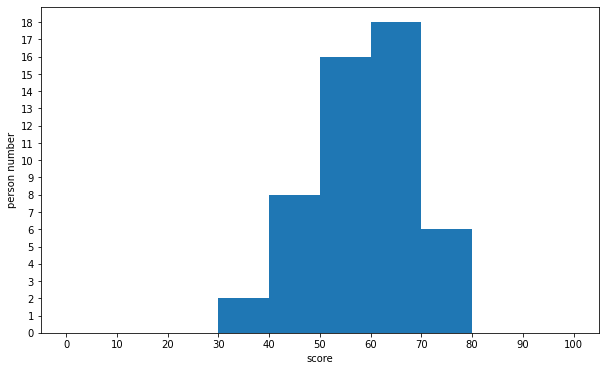

In [75]:
# figsize 가로 세로 크기 지정
fig = plt.figure(figsize=(10,6))
# 그래프 영역 지정
ax = fig.add_subplot(111)

# 히스토그램 생성
freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')

# X축을 0,10,20,..100 눈금으로 구분
ax.set_xticks(np.linspace(0,100,10+1))
# Y축을 0,1,2,...의 눈금으로 구분
ax.set_yticks(np.arange(0,freq.max()+1))

plt.show()

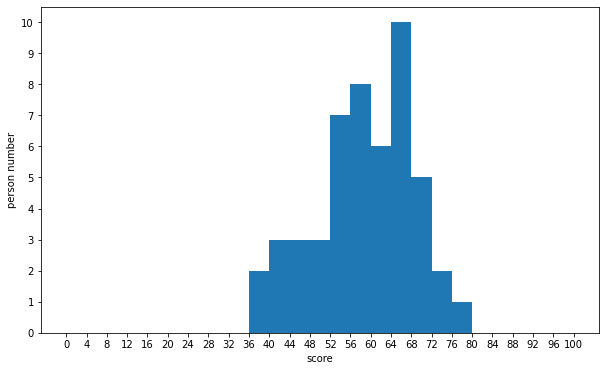

In [76]:
# 계급수를 늘려 더 세부적인 데이터의 분포 확인

# figsize 가로 세로 크기 지정
fig = plt.figure(figsize=(10,6))
# 그래프 영역 지정
ax = fig.add_subplot(111)

# 히스토그램 생성
freq, _, _ = ax.hist(english_scores, bins=25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,freq.max()+1))

plt.show()

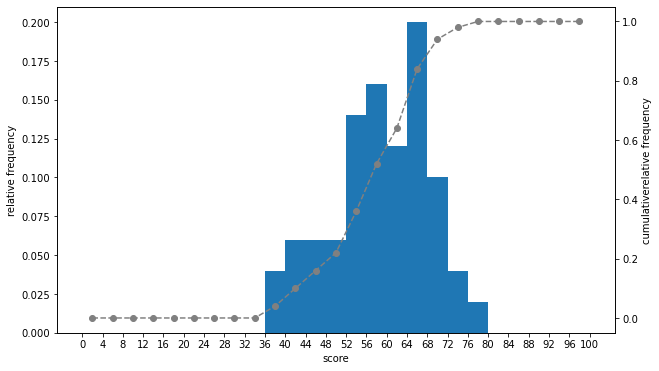

In [77]:
# 상대도수의 히스토그램을 누적상대도수의 꺾은선 그래프와 함께 그리기.

# figsize 가로 세로 크기 지정
fig = plt.figure(figsize=(10,6))
# 그래프 영역 지정
ax1 = fig.add_subplot(111)

ax2 = ax1.twinx() # ax1과 동일한 영역에 생성

# 도수를 데이터의 수로 나누기
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                         range=(0,100), weights = weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]

# 꺾은선 그래프
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')

# 눈금선 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulativerelative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

### 상자그림

In [ ]:
#### Box plot 의미 해석
- 데이터의 산포도를 표현하는 그림

* IQR(Inter Quartile Range): 제 3사분위수 - 제1사분위수
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값


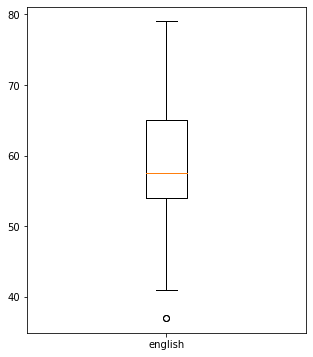

In [79]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()

#### [과제2]
1차원 데이터를 생성하여 다음을 수행하세요.
- 도수분포표를 만들고 히스토그램을 시각화하세요. (계급을 변경하여 2개를 작성)
- 상대도수 및 누적상대도수를 도수분포표에 추가하고 히스토그램과 누적상대도수를 시각화하세요.


In [80]:
age = np.random.randint(0,100,100)
age

array([45, 49, 34, 29, 16, 38, 89, 80, 50, 97, 99, 74, 39, 99, 25, 13, 69,
       68, 64, 79, 68, 75, 34, 52, 37, 16, 91, 96, 67, 38, 62, 81, 80, 45,
        0, 49,  9, 10, 45, 21, 66, 13, 98, 15, 75, 98,  5, 39, 54, 77, 81,
       76, 36, 61,  6, 11, 23, 12, 69, 62, 93, 83, 89,  9, 53, 70, 39, 29,
       54, 75, 37, 21, 97, 34, 18, 12, 53, 98, 79, 42, 82, 72, 33, 13, 86,
       18, 92, 61, 20,  9, 47, 79, 21, 16, 90, 71, 53,  7, 56,  2])

In [81]:
pd.Series(age).describe()

count    100.000000
mean      51.220000
std       29.503494
min        0.000000
25%       22.500000
50%       52.500000
75%       76.250000
max       99.000000
dtype: float64

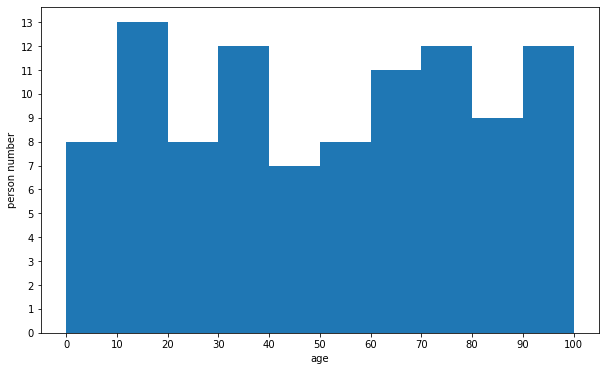

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

# figsize 가로 세로 크기 지정
fig = plt.figure(figsize=(10,6))
# 그래프 영역 지정
ax = fig.add_subplot(111)

# 히스토그램 생성
freq, _, _ = ax.hist(age, bins=10, range=(0,100))
ax.set_xlabel('age')
ax.set_ylabel('person number')

# X축을 0,10,20,..100 눈금으로 구분
ax.set_xticks(np.linspace(0,100,10+1))
# Y축을 0,1,2,...의 눈금으로 구분
ax.set_yticks(np.arange(0,freq.max()+1))

plt.show()

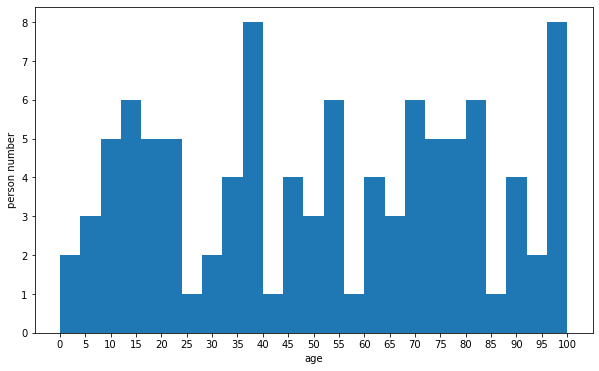

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

# figsize 가로 세로 크기 지정
fig = plt.figure(figsize=(10,6))
# 그래프 영역 지정
ax = fig.add_subplot(111)

# 히스토그램 생성
freq, _, _ = ax.hist(age, bins=25, range=(0,100))
ax.set_xlabel('age')
ax.set_ylabel('person number')

ax.set_xticks(np.linspace(0,100,20+1))
ax.set_yticks(np.arange(0,freq.max()+1))

plt.show()

# 2차원 데이터

In [86]:
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


## 두 데이터 사이의 관계를 나타내는 지표

### 공분산

In [88]:
import numpy as np
import pandas as pd

%precision 3

'%.3f'

In [90]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                         'mathematics':ma_scores},
                        index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                      name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [101]:
summary_df = scores_df.copy()
summary_df['englsih_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['englsih_deviation']*summary_df['mathematics_deviation']
summary_df

,english,mathematics,englsih_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [102]:
summary_df['product of deviations'].mean()

62.800

In [103]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [104]:
cov_mat[0,1], cov_mat[1,0]

(62.800, 62.800)

In [105]:
cov_mat[0,0], cov_mat[1,1]

(86.000, 68.440)

In [106]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

### 상관계수

In [107]:
np.cov(en_scores, ma_scores, ddof=0)[0,1]/(np.std(en_scores)*np.std(ma_scores))

0.819

In [108]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [109]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


## 2차원 데이터의 시각화

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

### 산점도

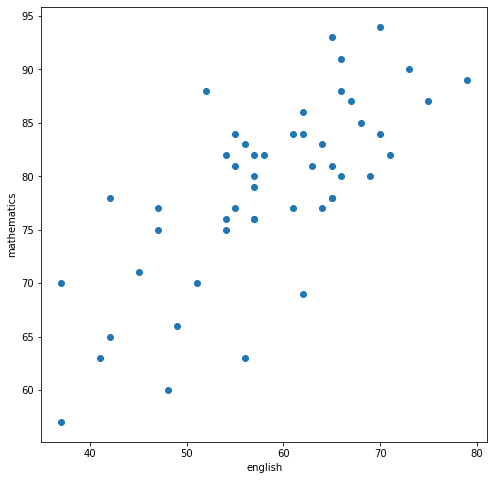

In [111]:
englsih_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

### 회귀직선

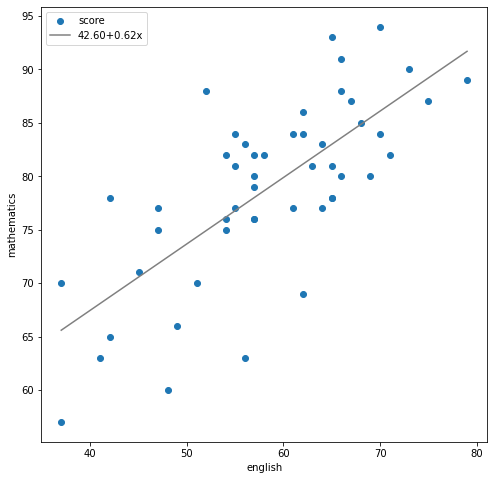

In [113]:
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(english_scores.min(), english_scores.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label = 'score')
ax.plot(xs, ys, color='gray',
       label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.legend(loc='upper left')
plt.show()

### 히트맵

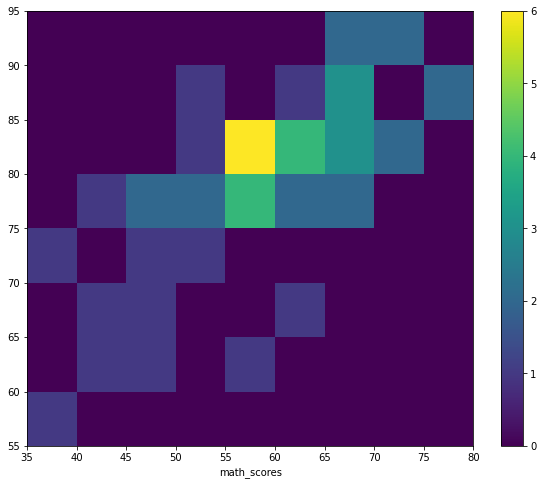

In [114]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
             bins=[9,8], range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_xlabel('math_scores')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()

#### [과제3]
2차원 데이터를 생성하여 다음을 수행하세요.(데이터 수 각각 1000개 이상)

- 공분산 및 상관계수를 구하세요.
- 이차원 데이터를 산점도, 히트맵으로 시각화한 후 인사이트를 기술하세요.